In [1]:
from keras.preprocessing.image import ImageDataGenerator , load_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as k

import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline

Using TensorFlow backend.


NO Lung Disease


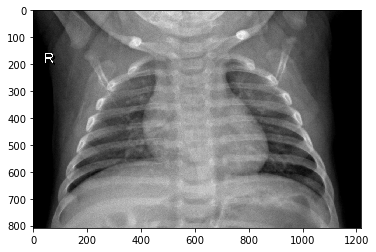

In [2]:
image_name = 'NORMAL2-IM-0588-0001.jpeg'
image_normal = load_img('train/NORMAL/' + image_name)

print('NO Lung Disease')
plt.imshow(image_normal)
plt.show()

Bacterial Pneumonia


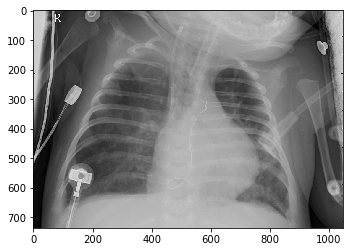

In [3]:
img_name = 'person63_bacteria_306.jpeg'
img_bac_pnemonia = load_img('train/PNEUMONIA/'+img_name)

print('Bacterial Pneumonia')
plt.imshow(img_bac_pnemonia)
plt.show()

Viral Pneumonia


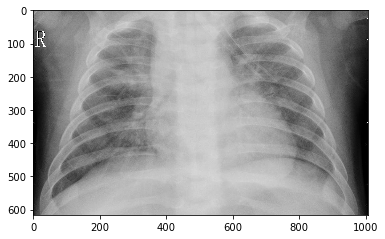

In [4]:
img_name = 'person1003_virus_1685.jpeg'
img_vir_pnemonia = load_img('train/PNEUMONIA/'+img_name)

print('Viral Pneumonia')
plt.imshow(img_vir_pnemonia)
plt.show()

In [5]:
img_vir_pnemonia.size

(1008, 616)

In [6]:
img_width , img_height = 150 , 150

In [52]:
train_data_dir = "train"
validation_data_dir = "val"
test_data_dir = "test"

nb_train_samples = 5217
np_validation_samples = 17
epochs = 10
batch_size = 16

In [8]:
if (k.image_data_format() == 'channels_first'):
    input_shape = (3 , img_width , img_height)
else:
    input_shape = (img_width , img_height , 3)

In [42]:
model = Sequential()
model.add(Conv2D(128 , (3,3) , input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64 , (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64 , (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32 , (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [56]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 148, 148, 128)     3584      
_________________________________________________________________
activation_11 (Activation)   (None, 148, 148, 128)     0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 74, 74, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 72, 72, 64)        73792     
_________________________________________________________________
activation_12 (Activation)   (None, 72, 72, 64)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 34, 34, 64)       

In [44]:
model.input

<tf.Tensor 'conv2d_7_input:0' shape=(?, 150, 150, 3) dtype=float32>

In [45]:
model.output

<tf.Tensor 'activation_16/Sigmoid:0' shape=(?, 1) dtype=float32>

In [46]:
model.compile(loss='binary_crossentropy',
             optimizer = 'adam',
             metrics=['accuracy'])

In [47]:
train_datagen = ImageDataGenerator(
 rescale=1. /255,
 shear_range=0.2,
 zoom_range=0.2,
 horizontal_flip=True)

In [48]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [49]:
train_generator = train_datagen.flow_from_directory(
train_data_dir,
target_size=(img_width , img_height),
batch_size=batch_size,
class_mode = 'binary')

Found 5216 images belonging to 2 classes.


In [50]:
validation_generator = test_datagen.flow_from_directory(
validation_data_dir,
target_size=(img_width , img_height),
batch_size=batch_size,
class_mode = 'binary')

Found 16 images belonging to 2 classes.


In [51]:
test_generator = test_datagen.flow_from_directory(
test_data_dir,
target_size=(img_width , img_height),
batch_size=batch_size,
class_mode = 'binary')

Found 624 images belonging to 2 classes.


In [53]:
x = model.fit_generator(
train_generator,
steps_per_epoch=nb_train_samples // batch_size,
epochs=epochs,
validation_data=validation_generator,
validation_steps=nb_train_samples // batch_size)

Epoch 1/10
326/326 [==============================] - 446s 1s/step - loss: 0.5481 - accuracy: 0.7519 - val_loss: 0.9181 - val_accuracy: 0.6250
Epoch 2/10
326/326 [==============================] - 429s 1s/step - loss: 0.3582 - accuracy: 0.8002 - val_loss: 0.5512 - val_accuracy: 0.9375
Epoch 3/10
326/326 [==============================] - 424s 1s/step - loss: 0.3158 - accuracy: 0.8407 - val_loss: 0.6448 - val_accuracy: 0.7500
Epoch 4/10
326/326 [==============================] - 409s 1s/step - loss: 0.2935 - accuracy: 0.8861 - val_loss: 0.6058 - val_accuracy: 0.7500
Epoch 5/10
326/326 [==============================] - 315s 966ms/step - loss: 0.2780 - accuracy: 0.8993 - val_loss: 0.9152 - val_accuracy: 0.8125
Epoch 6/10
326/326 [==============================] - 309s 949ms/step - loss: 0.2681 - accuracy: 0.8932 - val_loss: 0.7050 - val_accuracy: 0.8125
Epoch 7/10
326/326 [==============================] - 326s 999ms/step - loss: 0.2744 - accuracy: 0.8990 - val_loss: 0.5625 - val_accurac

In [54]:
model.save_weights('second_try.pth')

In [55]:
scores = model.evaluate_generator(test_generator)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


accuracy: 88.78%
